In [1]:
import random
import numpy as np
import sectionproperties.pre.sections as sections
from sectionproperties.analysis.cross_section import CrossSection
import time

start_time = time.time()

In [2]:
def pickOne(array):
    index = 0
    r = random.uniform(0,1)
    while(r>0):
        r -= array[index].fitness
        index += 1
    index -= 1
    return array[index]

In [3]:
class Population:
    def __init__(self,size):
        self.size = size
        self.individuals = []
        self.maxFitness = 0
        
        for _ in range(self.size):
            self.individuals.append(Individual())

    def selection(self):
        self.maxFitness = 0
        self.totalFitness = 0
               
        #fitness scores
        for i in range(self.size):
            ind = self.individuals[i]
            ind.calcFitness()
            self.totalFitness += ind.fitness
            if ind.fitness > self.maxFitness:
                self.maxFitness = ind.fitness

        #best of current generation
        self.best = sorted(self.individuals, key=lambda indiv: indiv.fitness, reverse=True)[0].DNA.genes
        bests.append(sorted(self.individuals, key=lambda ind: ind.fitness, reverse=True)[0])
                
        #normalize fitness and add to mating pool
        for ind in self.individuals:
            ind.fitness /= self.totalFitness
            #print(ind.fitness)
##            for _ in range(int(ind.fitness * 100)):
##                self.matingPool.append(ind)
                

    def crossover(self):
        offspring = []
        for _ in range(self.size):
            parent1 = np.array(pickOne(self.individuals).DNA.genes)
            parent2 = np.array(pickOne(self.individuals).DNA.genes)
            
            split = random.randint(0,parent1.size)
            c_genes = np.append(parent1[:split],parent2[split:])
            
            child = Individual(genes=c_genes)
            child.calcFitness()
            offspring.append(child)

        self.individuals = offspring
        
    def mutate(self):
        pass
        #print('mutation')
        

In [4]:
class DNA:
    def __init__(self,genes):
        if len(genes) == 0:
            self.genes = []
            self.d = random.uniform(0,100)
            self.t = random.uniform(0,self.d/2)
            self.genes = [self.d,self.t]
        else:
            self.genes = genes

In [5]:
class Individual:
    def __init__(self,genes=[]):
        self.DNA = DNA(genes)
        self.fitness = 0

        self.geometry = sections.Chs(d=self.DNA.genes[0], t=self.DNA.genes[1], n=32)
        self.mesh = self.geometry.create_mesh(mesh_sizes=[5])
        self.section = CrossSection(self.geometry,self.mesh)

        self.section.calculate_geometric_properties(time_info=False)
        #self.section.calculate_warping_properties(time_info=False)

    def calcFitness(self):
        self.fitness = self.section.get_rc()[0]**2

In [6]:
n_generations = 4

population = Population(5)
bests = []

In [7]:
for i in range(1,n_generations+1):
    population.selection()
    population.crossover()
    population.mutate()
    print('Generation '+ str(i)+' | Max Fitness: '+ str(population.maxFitness)+' | '+ 'Best Section: '+str(population.best))

Generation 1 | Max Fitness: 901.7650953609715 | Best Section: [95.70485388382052, 11.240169056280383]
Generation 2 | Max Fitness: 1065.2813490241458 | Best Section: [95.70485388  3.14517169]
Generation 3 | Max Fitness: 1065.2813490241458 | Best Section: [95.70485388  3.14517169]
Generation 4 | Max Fitness: 1065.2813490241458 | Best Section: [95.70485388  3.14517169]


Section Properties:
A	 = 2.963492e+03
Qx	 = 9.130474e-12
Qy	 = -1.929834e-11
cx	 = -6.512028e-15
cy	 = 3.080985e-15
Ixx_g	 = 2.672373e+06
Iyy_g	 = 2.672373e+06
Ixy_g	 = -3.410605e-13
Ixx_c	 = 2.672373e+06
Iyy_c	 = 2.672373e+06
Ixy_c	 = -3.410605e-13
Zxx+	 = 5.584614e+04
Zxx-	 = 5.584614e+04
Zyy+	 = 5.584614e+04
Zyy-	 = 5.584614e+04
rx	 = 3.002940e+01
ry	 = 3.002940e+01
phi	 = 0.000000e+00
I11_c	 = 2.672373e+06
I22_c	 = 2.672373e+06
Z11+	 = 5.584614e+04
Z11-	 = 5.584614e+04
Z22+	 = 5.584614e+04
Z22-	 = 5.584614e+04
r11	 = 3.002940e+01
r22	 = 3.002940e+01



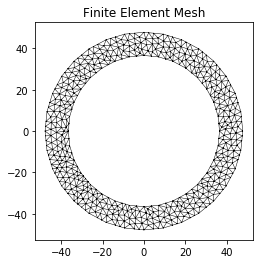

Section Properties:
A	 = 9.087029e+02
Qx	 = 8.327561e-12
Qy	 = -1.097078e-11
cx	 = -1.207301e-14
cy	 = 9.164228e-15
Ixx_g	 = 9.680243e+05
Iyy_g	 = 9.680243e+05
Ixy_g	 = 1.937224e-10
Ixx_c	 = 9.680243e+05
Iyy_c	 = 9.680243e+05
Ixy_c	 = 1.937224e-10
Zxx+	 = 2.022937e+04
Zxx-	 = 2.022937e+04
Zyy+	 = 2.022937e+04
Zyy-	 = 2.022937e+04
rx	 = 3.263865e+01
ry	 = 3.263865e+01
phi	 = 0.000000e+00
I11_c	 = 9.680243e+05
I22_c	 = 9.680243e+05
Z11+	 = 2.022937e+04
Z11-	 = 2.022937e+04
Z22+	 = 2.022937e+04
Z22-	 = 2.022937e+04
r11	 = 3.263865e+01
r22	 = 3.263865e+01



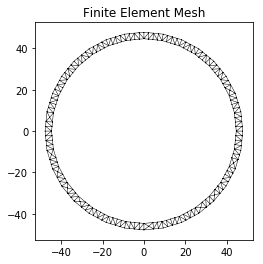

Section Properties:
A	 = 9.087029e+02
Qx	 = 8.327561e-12
Qy	 = -1.097078e-11
cx	 = -1.207301e-14
cy	 = 9.164228e-15
Ixx_g	 = 9.680243e+05
Iyy_g	 = 9.680243e+05
Ixy_g	 = 1.937224e-10
Ixx_c	 = 9.680243e+05
Iyy_c	 = 9.680243e+05
Ixy_c	 = 1.937224e-10
Zxx+	 = 2.022937e+04
Zxx-	 = 2.022937e+04
Zyy+	 = 2.022937e+04
Zyy-	 = 2.022937e+04
rx	 = 3.263865e+01
ry	 = 3.263865e+01
phi	 = 0.000000e+00
I11_c	 = 9.680243e+05
I22_c	 = 9.680243e+05
Z11+	 = 2.022937e+04
Z11-	 = 2.022937e+04
Z22+	 = 2.022937e+04
Z22-	 = 2.022937e+04
r11	 = 3.263865e+01
r22	 = 3.263865e+01



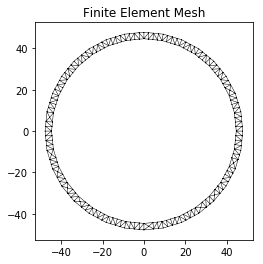

Section Properties:
A	 = 9.087029e+02
Qx	 = 8.327561e-12
Qy	 = -1.097078e-11
cx	 = -1.207301e-14
cy	 = 9.164228e-15
Ixx_g	 = 9.680243e+05
Iyy_g	 = 9.680243e+05
Ixy_g	 = 1.937224e-10
Ixx_c	 = 9.680243e+05
Iyy_c	 = 9.680243e+05
Ixy_c	 = 1.937224e-10
Zxx+	 = 2.022937e+04
Zxx-	 = 2.022937e+04
Zyy+	 = 2.022937e+04
Zyy-	 = 2.022937e+04
rx	 = 3.263865e+01
ry	 = 3.263865e+01
phi	 = 0.000000e+00
I11_c	 = 9.680243e+05
I22_c	 = 9.680243e+05
Z11+	 = 2.022937e+04
Z11-	 = 2.022937e+04
Z22+	 = 2.022937e+04
Z22-	 = 2.022937e+04
r11	 = 3.263865e+01
r22	 = 3.263865e+01



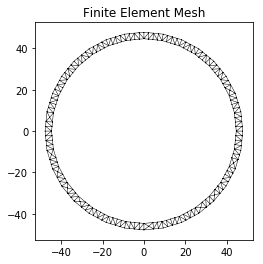

Time Elapsed: 00:00:49


In [8]:
for best in bests:
    best.section.display_results(fmt='8.6e')
    best.section.plot_mesh()
    #stress_post = best.section.calculate_stress(N=0, Vx=0, Vy=0, Mxx=100, Myy=0, M11=0, M22=0, Mzz=0)
    #stress_post.plot_stress_mxx_zz()
    
elapsed_time = time.time() - start_time 
print('Time Elapsed: '+ time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))